In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
from pandas.plotting import table 
from datetime import datetime


# Helper methods

In [2]:
def save(path):
    plt.savefig('../../images' + path)
    return

def loadDataSet():
#     df  = pd.read_csv("../input/stroke-dataset/stroke_subset.csv")
    return pd.read_csv("../input/stroke-dataset/stroke.csv")

In [3]:
df=loadDataSet();
df = df.drop('id',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


# Data Exploration

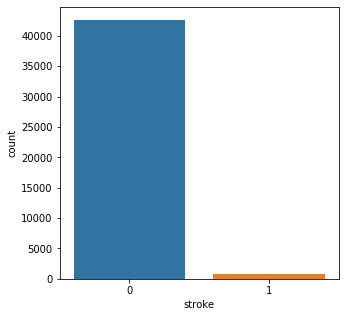

In [4]:
plt.figure(figsize=(5,5))
sns.countplot(x='stroke',data=df)
save('/building_ann/stroke_countplot.png')

In [5]:
df

gender   age  hypertension  heart_disease ever_married     work_type  \
0        Male   3.0             0              0           No      children   
1        Male  58.0             1              0          Yes       Private   
2      Female   8.0             0              0           No       Private   
3      Female  70.0             0              0          Yes       Private   
4        Male  14.0             0              0           No  Never_worked   
...       ...   ...           ...            ...          ...           ...   
43395  Female  10.0             0              0           No      children   
43396  Female  56.0             0              0          Yes      Govt_job   
43397  Female  82.0             1              0          Yes       Private   
43398    Male  40.0             0              0          Yes       Private   
43399  Female  82.0             0              0          Yes       Private   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0              Rural              95.12  18.0              NaN       0  
1              Urban              87.96  39.2     never smoked       0  
2              Urban             110.89  17.6              NaN       0  
3              Rural              69.04  35.9  formerly smoked       0  
4              Rural             161.28  19.1              NaN       0  
...              ...                ...   ...              ...     ...  
43395          Urban              58.64  20.4     never smoked       0  
43396          Urban             213.61  55.4  formerly smoked       0  
43397          Urban              91.94  28.9  formerly smoked       0  
43398          Urban              99.16  33.2     never smoked       0  
43399          Urban              79.48  20.6     never smoked       0  

[43400 rows x 11 columns]

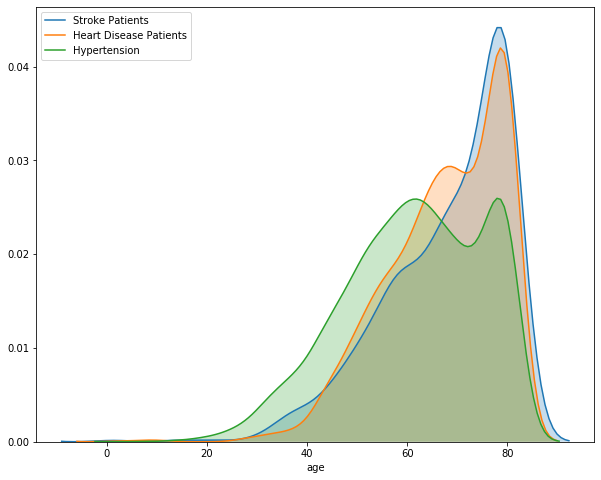

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(df.loc[df['stroke'] == 1]['age'], label='Stroke Patients', kde_kws={"shade": True},hist=False, bins =20)
sns.distplot(df.loc[df['heart_disease'] == 1]['age'], label='Heart Disease Patients', kde_kws={"shade": True},hist=False, bins =20)
sns.distplot(df.loc[df['hypertension'] == 1]['age'], label='Hypertension', kde_kws={"shade": True},hist=False, bins =20)
plt.legend()
save('/building_ann/stroke_age_distplot.png')

In [7]:
df['gender'].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [8]:
df.iloc[95]


gender                          Male
age                               34
hypertension                       0
heart_disease                      1
ever_married                     Yes
work_type                    Private
Residence_type                 Urban
avg_glucose_level             106.23
bmi                              NaN
smoking_status       formerly smoked
stroke                             0
Name: 95, dtype: object

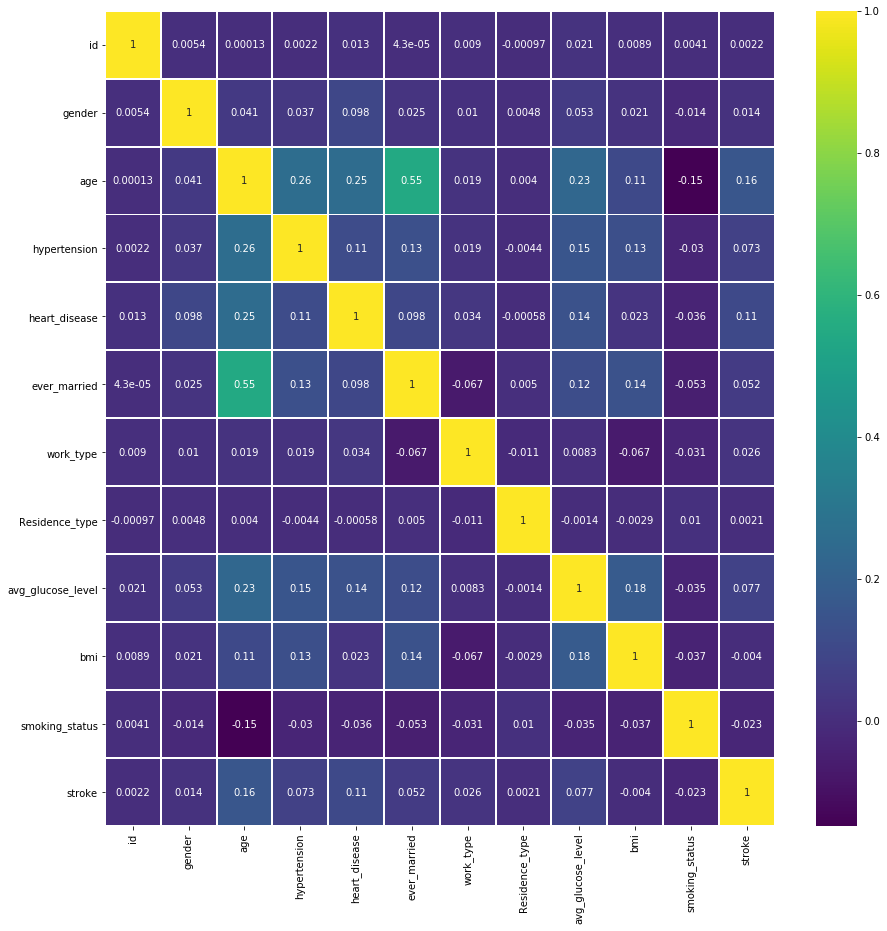

In [9]:
from sklearn import preprocessing
df_hm = loadDataSet()
le = preprocessing.LabelEncoder()
df_hm.gender = le.fit_transform(df_hm.gender)
df_hm.ever_married = le.fit_transform(df_hm.ever_married)
df_hm=df_hm.dropna(subset=['smoking_status'])
df_hm.smoking_status = le.fit_transform(df_hm.smoking_status)
df_hm.Residence_type = le.fit_transform(df_hm.Residence_type)
df_hm.work_type = le.fit_transform(df_hm.work_type)


plt.figure(figsize=(15,15))
sns.heatmap(df_hm.corr(),annot=True,cmap='viridis', linewidth=1)
plt.ylim(12, 0)
save('/building_ann/heatmap.png')

In [10]:
df_hm

id  gender   age  hypertension  heart_disease  ever_married  \
1      30468       1  58.0             1              0             1   
3      56543       0  70.0             0              0             1   
6      52800       0  52.0             0              0             1   
7      41413       0  75.0             0              1             1   
8      15266       0  32.0             0              0             1   
...      ...     ...   ...           ...            ...           ...   
43395  56196       0  10.0             0              0             0   
43396   5450       0  56.0             0              0             1   
43397  28375       0  82.0             1              0             1   
43398  27973       1  40.0             0              0             1   
43399  36271       0  82.0             0              0             1   

       work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
1              2               1              87.96  39.2               1   
3              2               0              69.04  35.9               0   
6              2               1              77.59  17.7               0   
7              3               0             243.53  27.0               1   
8              2               0              77.67  32.3               2   
...          ...             ...                ...   ...             ...   
43395          4               1              58.64  20.4               1   
43396          0               1             213.61  55.4               0   
43397          2               1              91.94  28.9               0   
43398          2               1              99.16  33.2               1   
43399          2               1              79.48  20.6               1   

       stroke  
1           0  
3           0  
6           0  
7           0  
8           0  
...       ...  
43395       0  
43396       0  
43397       0  
43398       0  
43399       0  

[30108 rows x 12 columns]

In [11]:
# plt.figure(figsize=(25,25))
# sns.pairplot(df_hm)
# save('/building_ann/pairplot.png')

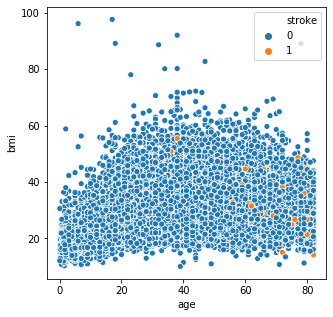

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='age',y='bmi', hue='stroke', data=df)
save('/building_ann/age_bmi_scatterplot.png')

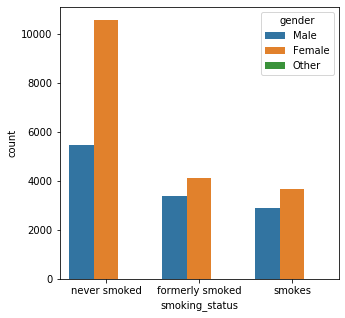

In [13]:
plt.figure(figsize=(5,5))
df = loadDataSet()
sns.countplot(x='smoking_status',data=df,hue='gender')
save('/building_ann/smoking_scatterplot.png')

In [14]:
len(df[df['stroke'] == 1 ])/len(df)

0.01804147465437788

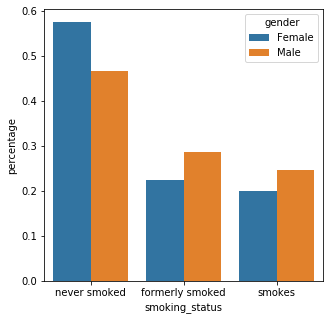

In [15]:
# Adapted code from: https://github.com/mwaskom/seaborn/issues/1027
plt.figure(figsize=(5,5))
df = loadDataSet()
genderOther = df[ df['gender'] == 'Other' ].index
df.drop(genderOther , inplace=True)
x, y, hue = "smoking_status", "percentage", "gender"
# hue_order = ["Male", "Female"]

#f, axes = plt.subplots(1, 2)
# sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df)#, ax=axes[1])
save('/building_ann/gender_smoking_percentage.png')

In [16]:

stroke_y = df[df['stroke'] == 1 ].groupby("smoking_status").count()['stroke']
stroke_n = df[df['stroke'] == 0 ].groupby("smoking_status").count()['stroke']
print(stroke_y/(stroke_y + stroke_n))

smoking_status
formerly smoked    0.029518
never smoked       0.017694
smokes             0.020271
Name: stroke, dtype: float64


In [17]:
df.groupby("smoking_status")['stroke'].value_counts(normalize=True)

smoking_status   stroke
formerly smoked  0         0.970482
                 1         0.029518
never smoked     0         0.982306
                 1         0.017694
smokes           0         0.979729
                 1         0.020271
Name: stroke, dtype: float64

In [18]:
np.bincount(df.apply(lambda x : 1 if x['gender']=='Male' else 0, axis =1))

array([25665, 17724], dtype=int64)

In [19]:
np.bincount(df['stroke'])

array([42606,   783], dtype=int64)

# Missing Data

In [20]:
df.isnull().sum()/len(df)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.033603
smoking_status       0.306299
stroke               0.000000
dtype: float64

In [21]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  18.0              NaN   
1           Private          Urban              87.96  39.2     never smoked   
2           Private          Urban             110.89  17.6              NaN   
3           Private          Rural              69.04  35.9  formerly smoked   
4      Never_worked          Rural             161.28  19.1              NaN   
...             ...            ...                ...   ...              ...   
43395      children          Urban              58.64  20.4     never smoked   
43396      Govt_job          Urban             213.61  55.4  formerly smoked   
43397       Private          Urban              91.94  28.9  formerly smoked   
43398       Private          Urban              99.16  33.2     never smoked   
43399       Private          Urban              79.48  20.6     never smoked   

       stroke  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
43395       0  
43396       0  
43397       0  
43398       0  
43399       0  

[43389 rows x 12 columns]

In [22]:
def fill_smoking_status(smoking_status, work_type, gender, age):
    if not pd.isnull(smoking_status):
        return smoking_status
    if work_type=='children' or gender =='Female' or age<18:
        return 'never smoked'
    return 'smokes'
df = loadDataSet()
df['smoking_status'] = df.apply(lambda x : fill_smoking_status(x['smoking_status'], x['work_type'], x['gender'], x['age']), axis=1)
smoking_dummies = pd.get_dummies(df['smoking_status'],drop_first=True)
df = pd.concat([df.drop('smoking_status',axis=1),smoking_dummies],axis=1)

df['gender'] = df['gender'].replace(["Other"], "Male")
gender_dummies = pd.get_dummies(df['gender'],drop_first=True)
df = pd.concat([df.drop('gender',axis=1),gender_dummies],axis=1)

bmi_avg= df.groupby('work_type').mean()['bmi']
df['bmi'] = df.apply(lambda x : bmi_avg[x['work_type']] if np.isnan(x['bmi']) else x['bmi'], axis =1)


work_type_dummies = pd.get_dummies(df['work_type'],drop_first=True)
df = pd.concat([df.drop('work_type',axis=1),work_type_dummies],axis=1)

married_dummies = pd.get_dummies(df['ever_married'],drop_first=True)
df = pd.concat([df.drop('ever_married',axis=1),married_dummies],axis=1)
df = df.rename(columns={'Yes': 'Married'})

residence_dummies = pd.get_dummies(df['Residence_type'],drop_first=True)
df = pd.concat([df.drop('Residence_type',axis=1),residence_dummies],axis=1)

df = df.drop('id',axis=1)


df

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0       3.0             0              0              95.12  18.0       0   
1      58.0             1              0              87.96  39.2       0   
2       8.0             0              0             110.89  17.6       0   
3      70.0             0              0              69.04  35.9       0   
4      14.0             0              0             161.28  19.1       0   
...     ...           ...            ...                ...   ...     ...   
43395  10.0             0              0              58.64  20.4       0   
43396  56.0             0              0             213.61  55.4       0   
43397  82.0             1              0              91.94  28.9       0   
43398  40.0             0              0              99.16  33.2       0   
43399  82.0             0              0              79.48  20.6       0   

       never smoked  smokes  Male  Never_worked  Private  Self-employed  \
0                 1       0     1             0        0              0   
1                 1       0     1             0        1              0   
2                 1       0     0             0        1              0   
3                 0       0     0             0        1              0   
4                 1       0     1             1        0              0   
...             ...     ...   ...           ...      ...            ...   
43395             1       0     0             0        0              0   
43396             0       0     0             0        0              0   
43397             0       0     0             0        1              0   
43398             1       0     1             0        1              0   
43399             1       0     0             0        1              0   

       children  Married  Urban  
0             1        0      0  
1             0        1      1  
2             0        0      1  
3             0        1      0  
4             0        0      0  
...         ...      ...    ...  
43395         1        0      1  
43396         0        1      1  
43397         0        1      1  
43398         0        1      1  
43399         0        1      1  

[43400 rows x 15 columns]

In [23]:
# def fill_smoking_status(smoking_status, work_type, gender, age):
#     if not pd.isnull(smoking_status):
#         return smoking_status
#     if work_type=='children' or gender =='Female' or age<18:
#         return 'never smoked'
#     return 'smokes'

# df = loadDataSet()
# df = df.drop('smoking_status',axis=1)
# df = df.dropna(subset=['bmi'])
# df = df.drop('bmi',axis=1)
# df = df.drop('gender',axis=1)
# df = df.drop('work_type',axis=1)
# df = df.drop('ever_married',axis=1)
# df = df.drop('Residence_type',axis=1)
# # df['smoking_status'] = df.apply(lambda x : fill_smoking_status(x['smoking_status'], x['work_type'], x['gender'], x['age']), axis=1)
# # smoking_dummies = pd.get_dummies(df['smoking_status'],drop_first=True)
# # df = pd.concat([df.drop('smoking_status',axis=1),smoking_dummies],axis=1)

# # df['gender'] = df['gender'].replace(["Other"], "Male")
# # gender_dummies = pd.get_dummies(df['gender'],drop_first=True)
# # df = pd.concat([df.drop('gender',axis=1),gender_dummies],axis=1)



# df = df.drop('id',axis=1)


# df

In [24]:

df.isnull().sum()

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
never smoked         0
smokes               0
Male                 0
Never_worked         0
Private              0
Self-employed        0
children             0
Married              0
Urban                0
dtype: int64

In [25]:
# # sorted(df['smoking_status'].unique())
# plt.figure(figsize=(10,10))
# sns.countplot(x='stroke',data=df,hue='smoking_status')

In [26]:
df.corr()

age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.272169       0.250188           0.237627   
hypertension       0.272169      1.000000       0.119777           0.160211   
heart_disease      0.250188      0.119777       1.000000           0.146938   
avg_glucose_level  0.237627      0.160211       0.146938           1.000000   
bmi                0.359555      0.158361       0.058548           0.188248   
stroke             0.156049      0.075332       0.113763           0.078917   
never smoked      -0.289450     -0.073422      -0.111078          -0.081701   
smokes             0.118157      0.021051       0.054971           0.027844   
Male              -0.027768      0.023902       0.082270           0.035695   
Never_worked      -0.069509     -0.019319      -0.014292          -0.014516   
Private            0.143657      0.007236      -0.006327           0.008048   
Self-employed      0.326913      0.100243       0.099342           0.080246   
children          -0.641240     -0.130171      -0.089559          -0.114174   
Married            0.693070      0.176575       0.128833           0.153607   
Urban              0.001299     -0.003124      -0.002743           0.000014   

                        bmi    stroke  never smoked    smokes      Male  \
age                0.359555  0.156049     -0.289450  0.118157 -0.027768   
hypertension       0.158361  0.075332     -0.073422  0.021051  0.023902   
heart_disease      0.058548  0.113763     -0.111078  0.054971  0.082270   
avg_glucose_level  0.188248  0.078917     -0.081701  0.027844  0.035695   
bmi                1.000000  0.022308     -0.175925  0.096763 -0.020754   
stroke             0.022308  1.000000     -0.043833  0.015820  0.011281   
never smoked      -0.175925 -0.043833      1.000000 -0.658491 -0.210051   
smokes             0.096763  0.015820     -0.658491  1.000000  0.212961   
Male              -0.020754  0.011281     -0.210051  0.212961  1.000000   
Never_worked      -0.021918 -0.008674      0.033258 -0.020449  0.002700   
Private            0.203401 -0.002464     -0.128436  0.113459 -0.052028   
Self-employed      0.084054  0.061195     -0.082699  0.022885 -0.002953   
children          -0.462608 -0.054115      0.309063 -0.212152  0.089127   
Married            0.342836  0.071920     -0.242106  0.128735 -0.031183   
Urban             -0.003619  0.002247     -0.000919  0.005024  0.001558   

                   Never_worked   Private  Self-employed  children   Married  \
age                   -0.069509  0.143657       0.326913 -0.641240  0.693070   
hypertension          -0.019319  0.007236       0.100243 -0.130171  0.176575   
heart_disease         -0.014292 -0.006327       0.099342 -0.089559  0.128833   
avg_glucose_level     -0.014516  0.008048       0.080246 -0.114174  0.153607   
bmi                   -0.021918  0.203401       0.084054 -0.462608  0.342836   
stroke                -0.008674 -0.002464       0.061195 -0.054115  0.071920   
never smoked           0.033258 -0.128436      -0.082699  0.309063 -0.242106   
smokes                -0.020449  0.113459       0.022885 -0.212152  0.128735   
Male                   0.002700 -0.052028      -0.002953  0.089127 -0.031183   
Never_worked           1.000000 -0.074011      -0.027566 -0.026017 -0.080734   
Private               -0.074011  1.000000      -0.498211 -0.470203  0.158857   
Self-employed         -0.027566 -0.498211       1.000000 -0.175134  0.199305   
children              -0.026017 -0.470203      -0.175134  1.000000 -0.546495   
Married               -0.080734  0.158857       0.199305 -0.546495  1.000000   
Urban                  0.003089  0.006050      -0.007136 -0.001578  0.004422   

                      Urban  
age                0.001299  
hypertension      -0.003124  
heart_disease     -0.002743  
avg_glucose_level  0.000014  
bmi               -0.003619  
stroke             0.002247  
never smoked      -0.000919  
smokes             0.005024  
Male   

## Split Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop('stroke', axis =1).values
y = df['stroke'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [29]:
help(table)

Help on function table in module pandas.plotting._misc:

table(ax, data, rowLabels=None, colLabels=None, **kwargs)
    Helper function to convert DataFrame and Series to matplotlib.table
    
    Parameters
    ----------
    ax : Matplotlib axes object
    data : DataFrame or Series
        data for table contents
    kwargs : keywords, optional
        keyword arguments which passed to matplotlib.table.table.
        If `rowLabels` or `colLabels` is not specified, data index or column
        name will be used.
    
    Returns
    -------
    matplotlib table object



# Train the Model

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
def plot_roc(name, labels, predictions, ax, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    lw = 2
    plt.plot(fp, tp, color='darkorange',
             lw=lw, label='ROC curve '+ name, **kwargs)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
def save_report_to_latex(model_name, report):
    df_latex = pd.DataFrame(report).transpose()
#     ax = plt.subplot(441, frame_on=False)
#     ax.xaxis.set_visible(False)  # hide the x axis
#     ax.yaxis.set_visible(False)  
#     table(ax, data=df_latex)
#     plt.savefig('../../images/building_ann/cr_' + model_name + '.png')
    
    with open('../../images/building_ann/' + model_name + '.tex','w') as tf:
        tf.write(df_latex.to_latex())
    return

# part of this code is inspired from https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
def plot_model_results(model_name, model):
    fig, (f1, f2, f3) =plt.subplots(1,3, figsize=(17,6))
    predictions = model.predict_classes(X_test)
    report = classification_report(y_test,predictions)
    print(report)
    report_json = classification_report(y_test,predictions, output_dict=True)
    save_report_to_latex(model_name, report_json)
    
    
    losses = pd.DataFrame(model.history.history)
    fig1 = losses[['loss','val_loss']].plot(ax=f1) 
    fig1.set_ylabel('Cost')
    fig1.set_xlabel('Epochs')
    
    cm = confusion_matrix(y_test,predictions > 0.5)
    fig2= sns.heatmap(cm, annot=True, fmt="d", ax=f2)
    fig2.set_title('Confusion matrix @{:.2f}'.format(0.5))
    fig2.set_ylabel('Actual label')
    fig2.set_xlabel('Predicted label')
    fig2.set_ylim(2, 0)

    fig3 = plot_roc("Train Baseline",y_train, model.predict_classes(X_train) , ax=f3)
    fig3 = plot_roc("Test Baseline", y_test, model.predict_classes(X_test), ax=f3, linestyle='--')
    save('/building_ann/' + model_name + '.png')
    plt.show()

In [32]:
help(table)

Help on function table in module pandas.plotting._misc:

table(ax, data, rowLabels=None, colLabels=None, **kwargs)
    Helper function to convert DataFrame and Series to matplotlib.table
    
    Parameters
    ----------
    ax : Matplotlib axes object
    data : DataFrame or Series
        data for table contents
    kwargs : keywords, optional
        keyword arguments which passed to matplotlib.table.table.
        If `rowLabels` or `colLabels` is not specified, data index or column
        name will be used.
    
    Returns
    -------
    matplotlib table object



In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from datetime import datetime
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

Using TensorFlow backend.


In [34]:
def create_model(model_name, X_train=X_train, y_train=y_train, with_weigths=True):
    model = Sequential()
    model.add(Dense(30,  activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(15,  activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=METRICS )
    
    class_weight= {0:1, 1:1}
    if (with_weigths):
        neg, pos = np.bincount(y_train)
        total = neg + pos
        print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
        total, pos, 100 * pos / total))
        weight_for_0 = (1 / neg)*(total)/2.0 
        weight_for_1 = (1 / pos)*(total)/2.0
        class_weight = {0: weight_for_0, 1: weight_for_1}
        print('Weight for class 0: {:.2f}'.format(weight_for_0))
        print('Weight for class 1: {:.2f}'.format(weight_for_1))
        
    model.fit(x=X_train, 
              y=y_train, 
              epochs=500,
              class_weight=class_weight,
              batch_size=250,
              validation_data=(X_test, y_test), 
              verbose=0,
              callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)]
              )
    
    plot_model_results(model_name,model)
    
    
#     return model.evaluate(X_test, y_test)

In [35]:
def create_model_logistic(model_name, X_train=X_train, y_train=y_train, with_weigths=True):
    from sklearn.linear_model import LogisticRegression
    
    
    class_weight= {0:1, 1:2}
    if (with_weigths):
        neg, pos = np.bincount(y_train)
        total = neg + pos
        print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
        total, pos, 100 * pos / total))
        weight_for_0 = (1 / neg)*(total)/2.0 
        weight_for_1 = (1 / pos)*(total)/2.0
        class_weight = {0: weight_for_0, 1: weight_for_1}
        print('Weight for class 0: {:.2f}'.format(weight_for_0))
        print('Weight for class 1: {:.2f}'.format(weight_for_1))

    logit = LogisticRegression(C=1, class_weight= class_weight, random_state = 123, solver='saga')
    
    logit.fit(X_train, y_train)
    predictions = logit.predict(X_test)
    print(classification_report(y_test, predictions))
    
    
#     return model.evaluate(X_test, y_test)

Examples:
    Total: 30380
    Positive: 543 (1.79% of total)

Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00086: early stopping
              precision    recall  f1-score   support

           0       0.99      0.77      0.87     12780
           1       0.06      0.74      0.11       240

    accuracy                           0.77     13020
   macro avg       0.53      0.75      0.49     13020
weighted avg       0.98      0.77      0.85     13020



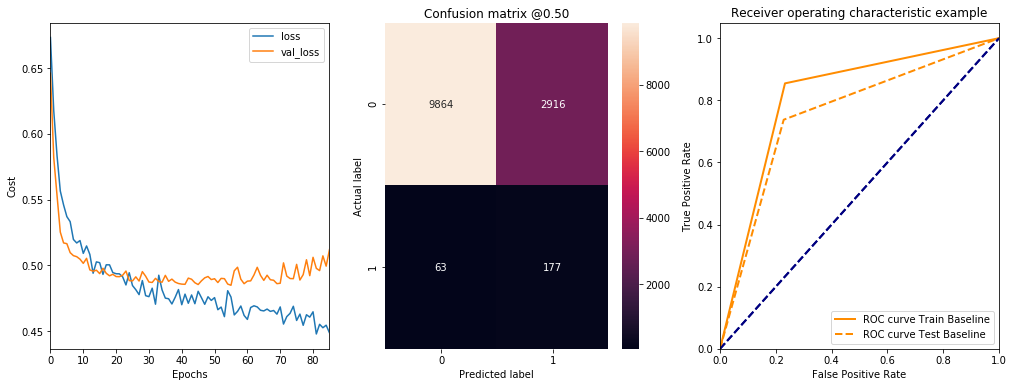

In [36]:
create_model('weighted')


In [37]:
# results[5]

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00081: early stopping


C:\Users\dan39\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12780
           1       0.00      0.00      0.00       240

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



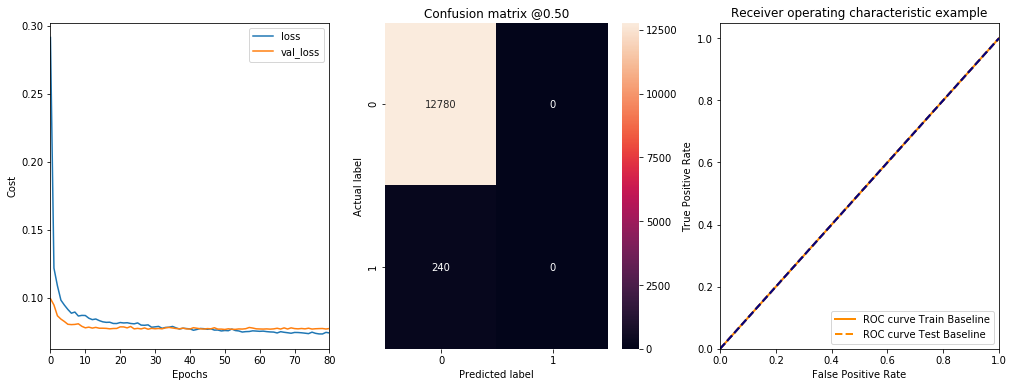

In [38]:
create_model('simple', with_weigths=False)


[29837   543]
[29837 29837]
Examples:
    Total: 59674
    Positive: 29837 (50.00% of total)

Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00061: early stopping
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     12780
           1       0.06      0.65      0.10       240

    accuracy                           0.79     13020
   macro avg       0.52      0.72      0.49     13020
weighted avg       0.97      0.79      0.86     13020



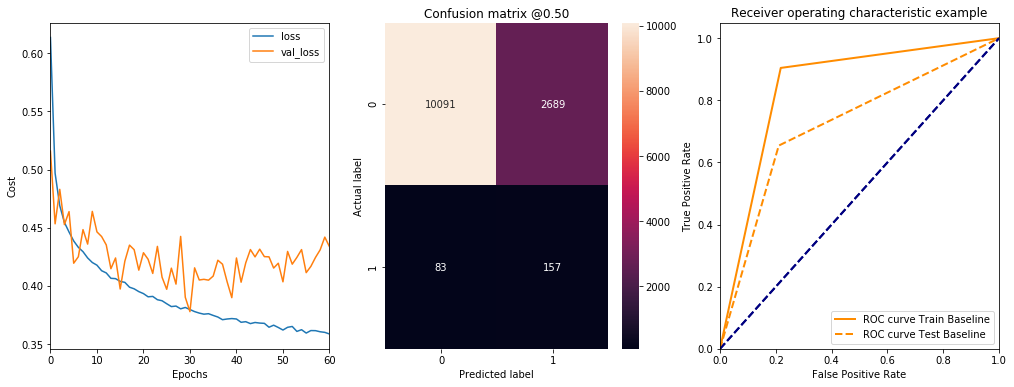

In [39]:
print(np.bincount(y_train))
smt = SMOTE()
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)
print(np.bincount(y_train_SMOTE))
create_model('smote',X_train_SMOTE,y_train_SMOTE)

[29837   543]
[543 543]
Examples:
    Total: 1086
    Positive: 543 (50.00% of total)

Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00031: early stopping
              precision    recall  f1-score   support

           0       0.98      0.37      0.53     12780
           1       0.02      0.70      0.04       240

    accuracy                           0.37     13020
   macro avg       0.50      0.53      0.29     13020
weighted avg       0.97      0.37      0.52     13020



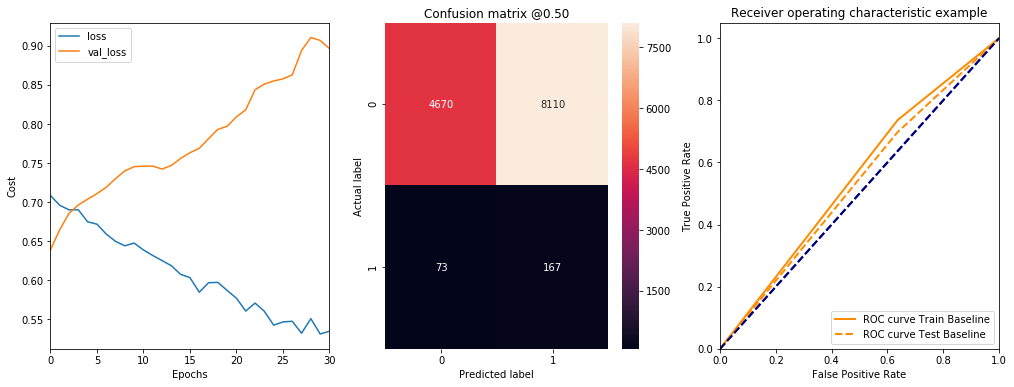

In [40]:
print(np.bincount(y_train))
nr = NearMiss()
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)
print(np.bincount(y_train_miss))
create_model('near_miss',X_train_miss,y_train_miss)

In [41]:
# print(np.bincount(y_train))
# cluster = ClusterCentroids()
# X_train_cluster, y_train_cluster = cluster.fit_sample(X_train, y_train)
# print(np.bincount(y_train_cluster))
# create_model('cluster', X_train_cluster, y_train_cluster)

[29837   543]
[29561 29561]
Examples:
    Total: 59122
    Positive: 29561 (50.00% of total)

Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00081: early stopping
              precision    recall  f1-score   support

           0       0.99      0.76      0.86     12780
           1       0.05      0.65      0.09       240

    accuracy                           0.76     13020
   macro avg       0.52      0.71      0.48     13020
weighted avg       0.97      0.76      0.85     13020



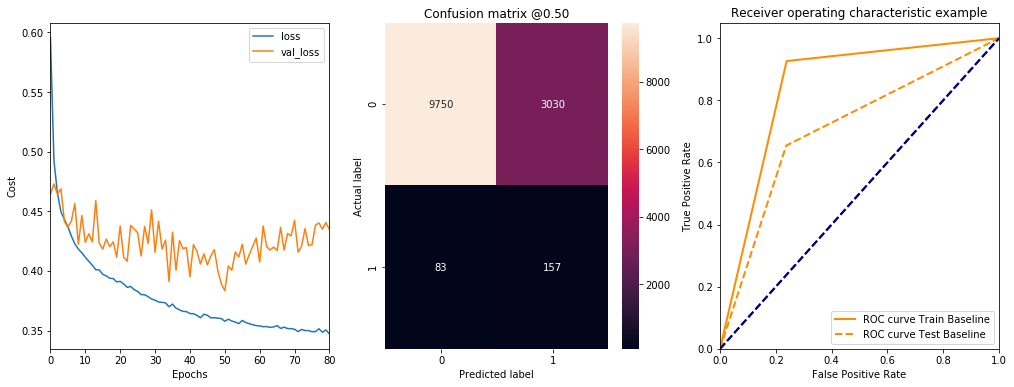

In [42]:
print(np.bincount(y_train))
smt = SMOTETomek('auto')
X_train_SMTomek, y_train_SMTomek = smt.fit_sample(X_train, y_train)
print(np.bincount(y_train_SMTomek))
create_model('SMOTETomek', X_train_SMTomek, y_train_SMTomek)

[29837   543]
[543 543]
Examples:
    Total: 1086
    Positive: 543 (50.00% of total)

Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00108: early stopping
              precision    recall  f1-score   support

           0       1.00      0.72      0.83     12780
           1       0.05      0.82      0.10       240

    accuracy                           0.72     13020
   macro avg       0.52      0.77      0.47     13020
weighted avg       0.98      0.72      0.82     13020



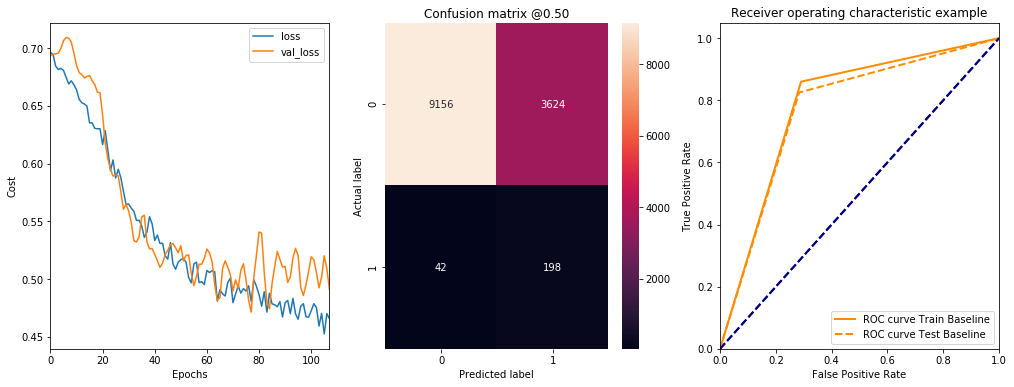

In [43]:
print(np.bincount(y_train))
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)
print(np.bincount(y_train_rus))
create_model('rus', X_train_rus, y_train_rus)

[29837   543]
[29837 29837]
Examples:
    Total: 59674
    Positive: 29837 (50.00% of total)

Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00118: early stopping
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     12780
           1       0.06      0.63      0.10       240

    accuracy                           0.80     13020
   macro avg       0.52      0.72      0.49     13020
weighted avg       0.97      0.80      0.87     13020



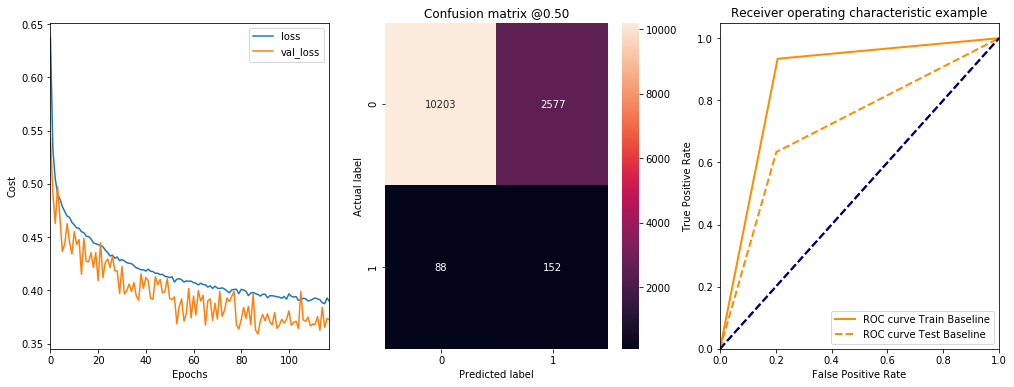

In [44]:
print(np.bincount(y_train))
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
print(np.bincount(y_train_ros))
create_model('ros', X_train_ros, y_train_ros)

[29837   543]
[29567 29567]
Examples:
    Total: 59134
    Positive: 29567 (50.00% of total)

Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00060: early stopping
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     12780
           1       0.06      0.69      0.11       240

    accuracy                           0.78     13020
   macro avg       0.52      0.74      0.49     13020
weighted avg       0.98      0.78      0.86     13020



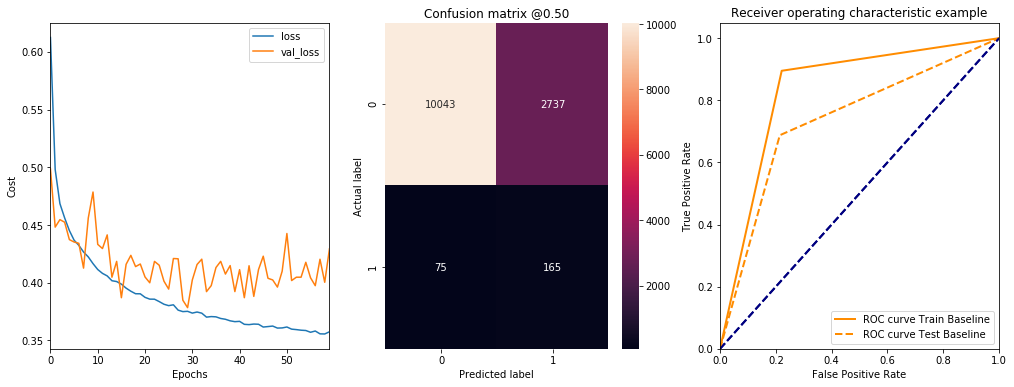

In [45]:
print(np.bincount(y_train))
smte = SMOTEENN('auto')
X_train_smte, y_train_smte = smt.fit_sample(X_train, y_train)
print(np.bincount(y_train_smte))
create_model('smte', X_train_smte, y_train_smte)

In [46]:
from tensorboard.plugins.hparams import api as hp
import os
HP_NUM_UNITS_L1 = hp.HParam('num_units_l1', hp.Discrete([16, 32, 49, 79]))
HP_NUM_UNITS_L2 = hp.HParam('num_units_l2', hp.Discrete([16,8,4]))
HP_NUM_UNITS_L3 = hp.HParam('num_units_l3', hp.Discrete([8,3]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
HP_LOSS = hp.HParam('loss', hp.Discrete(['mse', 'binary_crossentropy']))

# HP_NUM_UNITS_L1 = hp.HParam('num_units_l1', hp.Discrete([16]))
# HP_NUM_UNITS_L2 = hp.HParam('num_units_l2', hp.Discrete([4]))
# HP_NUM_UNITS_L3 = hp.HParam('num_units_l3', hp.Discrete([3]))
# HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.3))
# HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
# HP_LOSS = hp.HParam('loss', hp.Discrete(['binary_crossentropy']))

# print('Deleting previous logs')
# !del -f "logs\\"
# print('Delet previous logs')


base_dir = 'logs\\hparam_tuning\\' + datetime.now().strftime("%Y-%m-%d-%H%M") + '\\'
if not os.path.exists(base_dir):
        os.mkdir(base_dir)
        
METRIC_ACCURACY = 'accuracy'
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def train_test_model(model_name, hparams, logdir, X_train=X_train, y_train=y_train, with_weigths=True):
    model = Sequential()
    model.add(Dense(hparams[HP_NUM_UNITS_L1],  activation='relu'))
    model.add(Dropout(hparams[HP_DROPOUT]))
    model.add(Dense(hparams[HP_NUM_UNITS_L2],  activation='relu'))
    model.add(Dropout(hparams[HP_DROPOUT]))
    model.add(Dense(hparams[HP_NUM_UNITS_L3], activation='relu'))
    model.add(Dropout(hparams[HP_DROPOUT]))
    model.add(Dense(units=1,activation='sigmoid'))

    model.compile(loss=hparams[HP_LOSS], optimizer=hparams[HP_OPTIMIZER],  metrics=METRICS )
    
    class_weight= {0:1, 1:1}
    if (with_weigths):
        neg, pos = np.bincount(y_train)
        total = neg + pos
        print('Examples: Total: {} Positive: {} ({:.2f}% of total)'.format(
        total, pos, 100 * pos / total))
        weight_for_0 = (1 / neg)*(total)/2.0 
        weight_for_1 = (1 / pos)*(total)/2.0
        class_weight = {0: weight_for_0, 1: weight_for_1}
        print('Weight for class 0: {:.2f}'.format(weight_for_0))
        print('Weight for class 1: {:.2f}'.format(weight_for_1))
    
    
    model.fit(x=X_train, 
              y=y_train, 
              epochs=500,
              class_weight=class_weight,
              batch_size=250,
              validation_data=(X_test, y_test), 
              verbose=0,
              callbacks = [EarlyStopping(monitor='loss', mode='min', verbose=1, patience=30), 
                           tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1, 
                                                          write_images=True, update_freq='epoch'),  # log metrics
                           hp.KerasCallback(logdir, hparams)]
              )
    
#     plot_model_results(model_name,model)
    
    
    results = model.evaluate(X_test, y_test)
    print(results)
    return results

def run(run_name, hparams,  X_train=X_train, y_train=y_train):
    log_dir= base_dir + run_name
    if not os.path.exists(log_dir):
        os.mkdir(log_dir)
    with tf.summary.create_file_writer(log_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        results = train_test_model(run_name, hparams, log_dir, X_train, y_train)
        tf.summary.scalar('accuracy', results[5], step=1)
        tf.summary.scalar('auc', results[8], step=1)
        tf.summary.scalar('precision', results[6], step=1)

def hrun(dataset_name='default', X_train=X_train, y_train=y_train):
    session_num=0
    for num_units_l1 in HP_NUM_UNITS_L1.domain.values:
        for num_units_l2 in HP_NUM_UNITS_L2.domain.values:
            for num_units_l3 in HP_NUM_UNITS_L3.domain.values:
                for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
                    for optimizer in HP_OPTIMIZER.domain.values:
                        for loss in HP_LOSS.domain.values:
                            hparams = {
                              HP_NUM_UNITS_L1: num_units_l1,
                              HP_NUM_UNITS_L2: num_units_l2,
                              HP_NUM_UNITS_L3: num_units_l3,
                              HP_DROPOUT: dropout_rate,
                              HP_OPTIMIZER: optimizer,
                              HP_LOSS: loss}
                            run_name =dataset_name + "-run-%d" % session_num
                            print('\n--- ----------Starting trial:',  run_name, '--------------------------')
                            print({h.name: hparams[h] for h in hparams})
                            run(run_name, hparams,  X_train, y_train)
                            session_num += 1

In [47]:
# %load_ext tensorboard
# %reload_ext tensorboard

In [48]:
# %tensorboard --logdir=./logs

In [49]:
generated_datasets_X={}
generated_datasets_y={}

generated_datasets_X['weighted'] = X_train
generated_datasets_y['weighted'] = y_train

generated_datasets_X['smote'] = X_train_SMOTE
generated_datasets_y['smote'] = y_train_SMOTE

generated_datasets_X['smte'] = X_train_smte
generated_datasets_y['smte'] = y_train_smte

generated_datasets_X['SMOTETomek'] = X_train_SMTomek
generated_datasets_y['SMOTETomek'] = y_train_SMTomek

generated_datasets_X['ros'] = X_train_ros
generated_datasets_y['ros'] = y_train_ros

generated_datasets_X['rus'] = X_train_rus
generated_datasets_y['rus'] = y_train_rus

for key in generated_datasets_X.keys():
    print('Running dataset:' + key)
    hrun(key,generated_datasets_X.get(key), generated_datasets_y.get(key))

Running dataset:weighted

--- ----------Starting trial: weighted-run-0 --------------------------
{'num_units_l1': 16, 'num_units_l2': 4, 'num_units_l3': 3, 'dropout': 0.2, 'optimizer': 'adam', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00106: early stopping
13020/13020 [==============================] - 1s 89us/sample - loss: 0.4374 - tp: 198.0000 - fp: 3381.0000 - tn: 9399.0000 - fn: 42.0000 - accuracy: 0.7371 - precision: 0.0553 - recall: 0.8250 - auc: 0.8435
[0.43740880429836276, 198.0, 3381.0, 9399.0, 42.0, 0.7370968, 0.055322714, 0.825, 0.84346604]

--- ----------Starting trial: weighted-run-1 --------------------------
{'num_units_l1': 16, 'num_units_l2': 4, 'num_units_l3': 3, 'dropout': 0.2, 'optimizer': 'adam', 'loss': 'mse'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
 

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00208: early stopping
13020/13020 [==============================] - 1s 112us/sample - loss: 0.5264 - tp: 213.0000 - fp: 4379.0000 - tn: 8401.0000 - fn: 27.0000 - accuracy: 0.6616 - precision: 0.0464 - recall: 0.8875 - auc: 0.8386
[0.5264116467235641, 213.0, 4379.0, 8401.0, 27.0, 0.66159755, 0.046385016, 0.8875, 0.8385613]

--- ----------Starting trial: weighted-run-11 --------------------------
{'num_units_l1': 16, 'num_units_l2': 4, 'num_units_l3': 8, 'dropout': 0.2, 'optimizer': 'sgd', 'loss': 'mse'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00199: early stopping
13020/13020 [==============================] - 1s 81us/sample - loss: 0.1682 - tp: 202.0000 - fp: 3722.0000 - tn: 9058.0000 - fn: 38.0000 - accuracy: 0.7112 - precision: 0.0515 - recall: 0.8417 - auc: 0.8444
[0.16816200352117947, 202.0, 3722.0, 9058.0,

13020/13020 [==============================] - 1s 84us/sample - loss: 0.4436 - tp: 195.0000 - fp: 3200.0000 - tn: 9580.0000 - fn: 45.0000 - accuracy: 0.7508 - precision: 0.0574 - recall: 0.8125 - auc: 0.8440
[0.44358444403393477, 195.0, 3200.0, 9580.0, 45.0, 0.75076807, 0.05743741, 0.8125, 0.844017]

--- ----------Starting trial: weighted-run-21 --------------------------
{'num_units_l1': 16, 'num_units_l2': 8, 'num_units_l3': 3, 'dropout': 0.5, 'optimizer': 'adam', 'loss': 'mse'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00214: early stopping
13020/13020 [==============================] - 1s 83us/sample - loss: 0.1404 - tp: 204.0000 - fp: 3686.0000 - tn: 9094.0000 - fn: 36.0000 - accuracy: 0.7141 - precision: 0.0524 - recall: 0.8500 - auc: 0.8394
[0.14042231031277214, 204.0, 3686.0, 9094.0, 36.0, 0.71413213, 0.05244216, 0.85, 0.83942944]

--- ----------Starting trial:

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00195: early stopping
13020/13020 [==============================] - 1s 82us/sample - loss: 0.1907 - tp: 179.0000 - fp: 3166.0000 - tn: 9614.0000 - fn: 61.0000 - accuracy: 0.7522 - precision: 0.0535 - recall: 0.7458 - auc: 0.8223
[0.1906629782164335, 179.0, 3166.0, 9614.0, 61.0, 0.75215054, 0.053512707, 0.74583334, 0.82227063]

--- ----------Starting trial: weighted-run-32 --------------------------
{'num_units_l1': 16, 'num_units_l2': 16, 'num_units_l3': 3, 'dropout': 0.2, 'optimizer': 'adam', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00175: early stopping
13020/13020 [==============================] - 1s 87us/sample - loss: 0.4526 - tp: 188.0000 - fp: 3221.0000 - tn: 9559.0000 - fn: 52.0000 - accuracy: 0.7486 - precision: 0.0551 - recall: 0.7833 - auc: 0.8305
[0.45255215493032275, 

13020/13020 [==============================] - 1s 112us/sample - loss: 0.1719 - tp: 188.0000 - fp: 3288.0000 - tn: 9492.0000 - fn: 52.0000 - accuracy: 0.7435 - precision: 0.0541 - recall: 0.7833 - auc: 0.8218
[0.1718731552362442, 188.0, 3288.0, 9492.0, 52.0, 0.74347156, 0.054085154, 0.78333336, 0.8218351]

--- ----------Starting trial: weighted-run-42 --------------------------
{'num_units_l1': 16, 'num_units_l2': 16, 'num_units_l3': 8, 'dropout': 0.2, 'optimizer': 'sgd', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00188: early stopping
13020/13020 [==============================] - 1s 92us/sample - loss: 0.4641 - tp: 197.0000 - fp: 3319.0000 - tn: 9461.0000 - fn: 43.0000 - accuracy: 0.7418 - precision: 0.0560 - recall: 0.8208 - auc: 0.8466
[0.46412433747505444, 197.0, 3319.0, 9461.0, 43.0, 0.7417819, 0.05602958, 0.8208333, 0.8465651]

--- 

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00146: early stopping
13020/13020 [==============================] - 2s 176us/sample - loss: 0.5947 - tp: 172.0000 - fp: 2373.0000 - tn: 10407.0000 - fn: 68.0000 - accuracy: 0.8125 - precision: 0.0676 - recall: 0.7167 - auc: 0.7995
[0.5947304399881495, 172.0, 2373.0, 10407.0, 68.0, 0.8125192, 0.067583494, 0.71666664, 0.7995237]

--- ----------Starting trial: weighted-run-53 --------------------------
{'num_units_l1': 32, 'num_units_l2': 4, 'num_units_l3': 3, 'dropout': 0.5, 'optimizer': 'adam', 'loss': 'mse'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00154: early stopping
13020/13020 [==============================] - 1s 83us/sample - loss: 0.2036 - tp: 180.0000 - fp: 2788.0000 - tn: 9992.0000 - fn: 60.0000 - accuracy: 0.7813 - precision: 0.0606 - recall: 0.7500 - auc: 0.8226
[0.2036313752470661, 180.0, 2788.0, 99

13020/13020 [==============================] - 1s 78us/sample - loss: 0.5466 - tp: 158.0000 - fp: 2051.0000 - tn: 10729.0000 - fn: 82.0000 - accuracy: 0.8362 - precision: 0.0715 - recall: 0.6583 - auc: 0.8368
[0.546644230335722, 158.0, 2051.0, 10729.0, 82.0, 0.83617514, 0.071525574, 0.65833336, 0.83676374]

--- ----------Starting trial: weighted-run-63 --------------------------
{'num_units_l1': 32, 'num_units_l2': 4, 'num_units_l3': 8, 'dropout': 0.5, 'optimizer': 'sgd', 'loss': 'mse'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00303: early stopping
13020/13020 [==============================] - 1s 77us/sample - loss: 0.1994 - tp: 191.0000 - fp: 3097.0000 - tn: 9683.0000 - fn: 49.0000 - accuracy: 0.7584 - precision: 0.0581 - recall: 0.7958 - auc: 0.8416
[0.1994090309020378, 191.0, 3097.0, 9683.0, 49.0, 0.7583717, 0.058090024, 0.79583335, 0.84164757]

--- ----------Star

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00160: early stopping
13020/13020 [==============================] - 1s 83us/sample - loss: 0.1643 - tp: 197.0000 - fp: 3555.0000 - tn: 9225.0000 - fn: 43.0000 - accuracy: 0.7237 - precision: 0.0525 - recall: 0.8208 - auc: 0.8402
[0.1642628342828809, 197.0, 3555.0, 9225.0, 43.0, 0.72365594, 0.05250533, 0.8208333, 0.8402111]

--- ----------Starting trial: weighted-run-74 --------------------------
{'num_units_l1': 32, 'num_units_l2': 8, 'num_units_l3': 8, 'dropout': 0.2, 'optimizer': 'sgd', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00157: early stopping
13020/13020 [==============================] - 1s 83us/sample - loss: 0.4454 - tp: 199.0000 - fp: 3415.0000 - tn: 9365.0000 - fn: 41.0000 - accuracy: 0.7346 - precision: 0.0551 - recall: 0.8292 - auc: 0.8485
[0.44537230147744106, 199.0

13020/13020 [==============================] - 1s 81us/sample - loss: 0.1712 - tp: 201.0000 - fp: 3652.0000 - tn: 9128.0000 - fn: 39.0000 - accuracy: 0.7165 - precision: 0.0522 - recall: 0.8375 - auc: 0.8452
[0.1711549258863871, 201.0, 3652.0, 9128.0, 39.0, 0.71651304, 0.052167144, 0.8375, 0.8452339]

--- ----------Starting trial: weighted-run-84 --------------------------
{'num_units_l1': 32, 'num_units_l2': 16, 'num_units_l3': 3, 'dropout': 0.5, 'optimizer': 'adam', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00115: early stopping
13020/13020 [==============================] - 1s 97us/sample - loss: 0.4444 - tp: 193.0000 - fp: 3268.0000 - tn: 9512.0000 - fn: 47.0000 - accuracy: 0.7454 - precision: 0.0558 - recall: 0.8042 - auc: 0.8419
[0.44441334906444757, 193.0, 3268.0, 9512.0, 47.0, 0.7453917, 0.05576423, 0.8041667, 0.84188104]

--- ---

Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00225: early stopping
13020/13020 [==============================] - 1s 103us/sample - loss: 0.4841 - tp: 210.0000 - fp: 4212.0000 - tn: 8568.0000 - fn: 30.0000 - accuracy: 0.6742 - precision: 0.0475 - recall: 0.8750 - auc: 0.8456
[0.48413930527076193, 210.0, 4212.0, 8568.0, 30.0, 0.67419356, 0.047489822, 0.875, 0.84558165]

--- ----------Starting trial: weighted-run-95 --------------------------
{'num_units_l1': 32, 'num_units_l2': 16, 'num_units_l3': 8, 'dropout': 0.5, 'optimizer': 'sgd', 'loss': 'mse'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00302: early stopping
13020/13020 [==============================] - 1s 87us/sample - loss: 0.1616 - tp: 198.0000 - fp: 3508.0000 - tn: 9272.0000 - fn: 42.0000 - accur

Epoch 00259: early stopping
13020/13020 [==============================] - 1s 81us/sample - loss: 0.4409 - tp: 184.0000 - fp: 3024.0000 - tn: 9756.0000 - fn: 56.0000 - accuracy: 0.7634 - precision: 0.0574 - recall: 0.7667 - auc: 0.8298
[0.4409479499137896, 184.0, 3024.0, 9756.0, 56.0, 0.76344085, 0.057356607, 0.76666665, 0.82980967]

--- ----------Starting trial: weighted-run-105 --------------------------
{'num_units_l1': 49, 'num_units_l2': 4, 'num_units_l3': 8, 'dropout': 0.2, 'optimizer': 'adam', 'loss': 'mse'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00171: early stopping
13020/13020 [==============================] - 1s 100us/sample - loss: 0.1624 - tp: 190.0000 - fp: 3539.0000 - tn: 9241.0000 - fn: 50.0000 - accuracy: 0.7243 - precision: 0.0510 - recall: 0.7917 - auc: 0.8202
[0.16238019458159872, 190.0, 3539.0, 9241.0, 50.0, 0.7243472, 0.050952, 0.7916667, 0.82

[0.45911651912922136, 194.0, 3279.0, 9501.0, 46.0, 0.74462366, 0.055859488, 0.80833334, 0.8430873]

--- ----------Starting trial: weighted-run-115 --------------------------
{'num_units_l1': 49, 'num_units_l2': 8, 'num_units_l3': 3, 'dropout': 0.2, 'optimizer': 'sgd', 'loss': 'mse'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00219: early stopping
13020/13020 [==============================] - 1s 80us/sample - loss: 0.1783 - tp: 203.0000 - fp: 3551.0000 - tn: 9229.0000 - fn: 37.0000 - accuracy: 0.7244 - precision: 0.0541 - recall: 0.8458 - auc: 0.8457
[0.178348683990458, 203.0, 3551.0, 9229.0, 37.0, 0.72442394, 0.05407565, 0.84583336, 0.8456839]

--- ----------Starting trial: weighted-run-116 --------------------------
{'num_units_l1': 49, 'num_units_l2': 8, 'num_units_l3': 3, 'dropout': 0.5, 'optimizer': 'adam', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Posi

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00155: early stopping
13020/13020 [==============================] - 1s 83us/sample - loss: 0.1674 - tp: 184.0000 - fp: 2805.0000 - tn: 9975.0000 - fn: 56.0000 - accuracy: 0.7803 - precision: 0.0616 - recall: 0.7667 - auc: 0.8431
[0.16740680361215238, 184.0, 2805.0, 9975.0, 56.0, 0.78026116, 0.06155905, 0.76666665, 0.8431215]

--- ----------Starting trial: weighted-run-126 --------------------------
{'num_units_l1': 49, 'num_units_l2': 8, 'num_units_l3': 8, 'dropout': 0.5, 'optimizer': 'sgd', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00195: early stopping
13020/13020 [==============================] - 1s 85us/sample - loss: 0.4899 - tp: 186.0000 - fp: 2920.0000 - tn: 9860.0000 - fn: 54.0000 - accuracy: 0.7716 - precision: 0.0599 - recall: 0.7750 - auc: 0.8468
[0.48988403263179936, 18

13020/13020 [==============================] - 2s 143us/sample - loss: 0.1598 - tp: 204.0000 - fp: 3663.0000 - tn: 9117.0000 - fn: 36.0000 - accuracy: 0.7159 - precision: 0.0528 - recall: 0.8500 - auc: 0.8399
[0.159844953380239, 204.0, 3663.0, 9117.0, 36.0, 0.71589863, 0.052754074, 0.85, 0.83986896]

--- ----------Starting trial: weighted-run-136 --------------------------
{'num_units_l1': 49, 'num_units_l2': 16, 'num_units_l3': 8, 'dropout': 0.2, 'optimizer': 'adam', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00377: early stopping
13020/13020 [==============================] - 1s 87us/sample - loss: 0.4175 - tp: 169.0000 - fp: 2759.0000 - tn: 10021.0000 - fn: 71.0000 - accuracy: 0.7826 - precision: 0.0577 - recall: 0.7042 - auc: 0.8160
[0.41749550537213387, 169.0, 2759.0, 10021.0, 71.0, 0.78264207, 0.05771858, 0.70416665, 0.81596553]

---

Epoch 00173: early stopping
13020/13020 [==============================] - 1s 87us/sample - loss: 0.1539 - tp: 181.0000 - fp: 2917.0000 - tn: 9863.0000 - fn: 59.0000 - accuracy: 0.7714 - precision: 0.0584 - recall: 0.7542 - auc: 0.8364
[0.15391601730143786, 181.0, 2917.0, 9863.0, 59.0, 0.7714286, 0.05842479, 0.75416666, 0.8363683]

--- ----------Starting trial: weighted-run-146 --------------------------
{'num_units_l1': 79, 'num_units_l2': 4, 'num_units_l3': 3, 'dropout': 0.2, 'optimizer': 'sgd', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00284: early stopping
13020/13020 [==============================] - 1s 90us/sample - loss: 0.4731 - tp: 203.0000 - fp: 3802.0000 - tn: 8978.0000 - fn: 37.0000 - accuracy: 0.7051 - precision: 0.0507 - recall: 0.8458 - auc: 0.8465
[0.47308252362245423, 203.0, 3802.0, 8978.0, 37.0, 0.70514596, 0.050686643,

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00135: early stopping
13020/13020 [==============================] - 1s 91us/sample - loss: 0.4619 - tp: 189.0000 - fp: 3138.0000 - tn: 9642.0000 - fn: 51.0000 - accuracy: 0.7551 - precision: 0.0568 - recall: 0.7875 - auc: 0.8411
[0.46186802608809346, 189.0, 3138.0, 9642.0, 51.0, 0.75506914, 0.056807935, 0.7875, 0.84111714]

--- ----------Starting trial: weighted-run-157 --------------------------
{'num_units_l1': 79, 'num_units_l2': 4, 'num_units_l3': 8, 'dropout': 0.5, 'optimizer': 'adam', 'loss': 'mse'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00066: early stopping
13020/13020 [==============================] - 1s 85us/sample - loss: 0.1896 - tp: 193.0000 - fp: 3434.0000 - tn: 9346.0000 - fn: 47.0000 - accuracy: 0.7326 - precision: 0.0532 - recall: 0.8042 - auc: 0.8452
[0.18963271890825573, 193.0, 3434.0, 9346

13020/13020 [==============================] - 1s 103us/sample - loss: 0.4371 - tp: 200.0000 - fp: 3549.0000 - tn: 9231.0000 - fn: 40.0000 - accuracy: 0.7243 - precision: 0.0533 - recall: 0.8333 - auc: 0.8450
[0.43713078768938185, 200.0, 3549.0, 9231.0, 40.0, 0.7243472, 0.053347558, 0.8333333, 0.8450235]

--- ----------Starting trial: weighted-run-167 --------------------------
{'num_units_l1': 79, 'num_units_l2': 8, 'num_units_l3': 3, 'dropout': 0.5, 'optimizer': 'sgd', 'loss': 'mse'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00273: early stopping
13020/13020 [==============================] - 2s 120us/sample - loss: 0.1541 - tp: 213.0000 - fp: 4229.0000 - tn: 8551.0000 - fn: 27.0000 - accuracy: 0.6731 - precision: 0.0480 - recall: 0.8875 - auc: 0.8259
[0.15407223610834042, 213.0, 4229.0, 8551.0, 27.0, 0.6731183, 0.047951374, 0.8875, 0.8259192]

--- ----------Starting

Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00306: early stopping
13020/13020 [==============================] - 1s 92us/sample - loss: 0.1497 - tp: 167.0000 - fp: 2728.0000 - tn: 10052.0000 - fn: 73.0000 - accuracy: 0.7849 - precision: 0.0577 - recall: 0.6958 - auc: 0.8134
[0.14974592174253157, 167.0, 2728.0, 10052.0, 73.0, 0.78486943, 0.057685666, 0.6958333, 0.813438]

--- ----------Starting trial: weighted-run-178 --------------------------
{'num_units_l1': 79, 'num_units_l2': 16, 'num_units_l3': 3, 'dropout': 0.2, 'optimizer': 'sgd', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00270: early stopping
13020/13020 [==============================] - 2s 146us/sample - loss: 0.4609 - tp: 199.0000 - fp: 3451.0000 - tn: 9329.0000 

Epoch 00274: early stopping
13020/13020 [==============================] - 1s 98us/sample - loss: 0.1620 - tp: 194.0000 - fp: 3364.0000 - tn: 9416.0000 - fn: 46.0000 - accuracy: 0.7381 - precision: 0.0545 - recall: 0.8083 - auc: 0.8447
[0.16196342720414086, 194.0, 3364.0, 9416.0, 46.0, 0.7380952, 0.054525014, 0.80833334, 0.8446973]

--- ----------Starting trial: weighted-run-188 --------------------------
{'num_units_l1': 79, 'num_units_l2': 16, 'num_units_l3': 8, 'dropout': 0.5, 'optimizer': 'adam', 'loss': 'binary_crossentropy'}
Examples: Total: 30380 Positive: 543 (1.79% of total)
Weight for class 0: 0.51
Weight for class 1: 27.97
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00115: early stopping
13020/13020 [==============================] - 2s 140us/sample - loss: 0.5139 - tp: 196.0000 - fp: 3385.0000 - tn: 9395.0000 - fn: 44.0000 - accuracy: 0.7366 - precision: 0.0547 - recall: 0.8167 - auc: 0.8418
[0.5138966144687752, 196.0, 3385.0, 9395.0, 44.0, 0.7366359, 0.05473331

[0.22499094405848127, 171.0, 2459.0, 10321.0, 69.0, 0.80583715, 0.06501901, 0.7125, 0.78393674]

--- ----------Starting trial: smote-run-6 --------------------------
{'num_units_l1': 16, 'num_units_l2': 4, 'num_units_l3': 3, 'dropout': 0.5, 'optimizer': 'sgd', 'loss': 'binary_crossentropy'}
Examples: Total: 59674 Positive: 29837 (50.00% of total)
Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00412: early stopping
13020/13020 [==============================] - 2s 158us/sample - loss: 0.5141 - tp: 205.0000 - fp: 3934.0000 - tn: 8846.0000 - fn: 35.0000 - accuracy: 0.6952 - precision: 0.0495 - recall: 0.8542 - auc: 0.8469
[0.5141339913125046, 205.0, 3934.0, 8846.0, 35.0, 0.6951613, 0.04952887, 0.8541667, 0.8468952]

--- ----------Starting trial: smote-run-7 --------------------------
{'num_units_l1': 16, 'num_units_l2': 4, 'num_units_l3': 3, 'dropout': 0.5, 'optimizer': 'sgd', 'loss': 'mse'}
Examples: Total: 59674 Positive: 29837 

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00210: early stopping
13020/13020 [==============================] - 2s 150us/sample - loss: 0.3738 - tp: 179.0000 - fp: 3124.0000 - tn: 9656.0000 - fn: 61.0000 - accuracy: 0.7554 - precision: 0.0542 - recall: 0.7458 - auc: 0.8186
[0.37378027152539034, 179.0, 3124.0, 9656.0, 61.0, 0.75537634, 0.054193158, 0.74583334, 0.8185538]

--- ----------Starting trial: smote-run-17 --------------------------
{'num_units_l1': 16, 'num_units_l2': 8, 'num_units_l3': 3, 'dropout': 0.2, 'optimizer': 'adam', 'loss': 'mse'}
Examples: Total: 59674 Positive: 29837 (50.00% of total)
Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00154: early stopping
13020/13020 [==============================] - 3s 195us/sample - loss: 0.1410 - tp: 169.0000 - fp: 2875.0000 - tn: 9905.0000 - fn: 71.0000 - accuracy: 0.7737 - precision: 0.0555 - recall: 0.7042 - auc: 0.7903
[0.14095515979599843, 169.0, 2875.0, 9

13020/13020 [==============================] - 2s 119us/sample - loss: 0.4378 - tp: 191.0000 - fp: 3081.0000 - tn: 9699.0000 - fn: 49.0000 - accuracy: 0.7596 - precision: 0.0584 - recall: 0.7958 - auc: 0.8350
[0.43782103576235326, 191.0, 3081.0, 9699.0, 49.0, 0.75960064, 0.058374085, 0.79583335, 0.8349599]

--- ----------Starting trial: smote-run-27 --------------------------
{'num_units_l1': 16, 'num_units_l2': 8, 'num_units_l3': 8, 'dropout': 0.2, 'optimizer': 'sgd', 'loss': 'mse'}
Examples: Total: 59674 Positive: 29837 (50.00% of total)
Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00341: early stopping
13020/13020 [==============================] - 2s 125us/sample - loss: 0.1590 - tp: 194.0000 - fp: 3184.0000 - tn: 9596.0000 - fn: 46.0000 - accuracy: 0.7519 - precision: 0.0574 - recall: 0.8083 - auc: 0.8440
[0.15898529363942038, 194.0, 3184.0, 9596.0, 46.0, 0.7519201, 0.05743043, 0.80833334, 0.8440431]

--- ----------Start

Examples: Total: 59674 Positive: 29837 (50.00% of total)
Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00145: early stopping
13020/13020 [==============================] - 4s 282us/sample - loss: 0.1853 - tp: 161.0000 - fp: 2347.0000 - tn: 10433.0000 - fn: 79.0000 - accuracy: 0.8137 - precision: 0.0642 - recall: 0.6708 - auc: 0.7661
[0.18525494186468022, 161.0, 2347.0, 10433.0, 79.0, 0.8136713, 0.064194575, 0.67083335, 0.7660964]

--- ----------Starting trial: smote-run-38 --------------------------
{'num_units_l1': 16, 'num_units_l2': 16, 'num_units_l3': 3, 'dropout': 0.5, 'optimizer': 'sgd', 'loss': 'binary_crossentropy'}
Examples: Total: 59674 Positive: 29837 (50.00% of total)
Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00252: early stopping
13020/13020 [==============================] - 2s 162us/sample - loss: 0.4222 - tp: 197.0000 - fp: 3484.0000 - tn: 9296.000

13020/13020 [==============================] - 4s 291us/sample - loss: 0.1524 - tp: 199.0000 - fp: 3413.0000 - tn: 9367.0000 - fn: 41.0000 - accuracy: 0.7347 - precision: 0.0551 - recall: 0.8292 - auc: 0.8490
[0.15237197362790642, 199.0, 3413.0, 9367.0, 41.0, 0.7347158, 0.05509413, 0.82916665, 0.84901553]

--- ----------Starting trial: smote-run-48 --------------------------
{'num_units_l1': 32, 'num_units_l2': 4, 'num_units_l3': 3, 'dropout': 0.2, 'optimizer': 'adam', 'loss': 'binary_crossentropy'}
Examples: Total: 59674 Positive: 29837 (50.00% of total)
Weight for class 0: 1.00
Weight for class 1: 1.00
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Epoch 00338: early stopping
13020/13020 [==============================] - 2s 187us/sample - loss: 0.3952 - tp: 124.0000 - fp: 1812.0000 - tn: 10968.0000 - fn: 116.0000 - accuracy: 0.8519 - precision: 0.0640 - recall: 0.5167 - auc: 0.7625
[0.39520400666421457, 124.0, 1812.0, 10968.0, 116.0, 0.8519201, 0.06404959, 0.51666665, 0.76253295]

ProfilerNotRunningError: Cannot stop profiling. No profiler is running.

In [ ]:
datetime.now()

In [ ]:
roc_curve(y_test,predictions)

In [ ]:
len(predictions)

In [ ]:
row = 300
patient = df.drop('stroke', axis = 1).iloc[row]
patient

In [ ]:
patient = scaler.transform(patient.values.reshape(1,13))
patient

In [ ]:
model.predict_classes(patient)[0][0]

In [ ]:
for row in range (0,10):
    patient = df.drop('stroke', axis = 1).iloc[row]
    patient = scaler.transform(patient.values.reshape(1,13))
    prediction = (model.predict_classes(patient))[0][0]
    print ("Predicted:{} Actual:{}".format(prediction,df.iloc[row]['stroke']))